In [1]:
# %matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for plotting
# import seaborn as sns

import scipy.stats as stats  # for statistics

In [2]:
sheet = pd.read_csv("./Titanic.csv")
sheet.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0. 男性与女性的年龄分布有无差异
2. 男性与女性的死亡率有无统计学差异
3. 已婚女性与未婚女性死亡率有无统计学差异
4. 死亡率与年龄有无关联

## Q1: 男性与女性的年龄分布有无差异

t test 与 rank-sum

In [21]:
_male_age = sheet[sheet.Sex == 'male'].Age.values
_male_age = _male_age[~np.isnan(_male_age)]

_female_age = sheet[sheet.Sex == 'female'].Age.values
_female_age = _female_age[~np.isnan(_female_age)]

stats.shapiro(_female_age) # test for normality

# stats.bartlett  # test for equal variances
# stats.levene(_male_age, _female_age)  # test for equal variances

stats.ttest_ind(_male_age, _female_age)  # student's t test for two independed samples
stats.ranksums(_male_age, _female_age)  # ranksum test

RanksumsResult(statistic=2.036901383786552, pvalue=0.04165992544246427)

---


## Q2: 男性与女性的死亡率有无统计学差异

四格表卡方检验
$$ \chi^2 = \frac{n(ad -bc)^2}{(a+b)(b+d)(d+c)(c+a)}, \nu = 1 $$



|.|Survived| Not Survived|
|-|-|-|
|Male|a|b|
|Female|c|d|

In [22]:
def _get_chi_sq(a,b,c,d):
    return (a+b+c+d) * (a*d - b*c) ** 2 / ((a+b)*(b+d)*(d+c)*(c+a))

In [31]:
_male_survived = len(sheet[(sheet.Sex == 'male') & (sheet.Survived == 1)])
_male_not_survived = len(sheet[(sheet.Sex == 'male') & (sheet.Survived == 0)])

_female_survived = len(sheet[(sheet.Sex == 'female') & (sheet.Survived == 1)])
_female_not_survived = len(sheet[(sheet.Sex == 'female') & (sheet.Survived == 0)])

_chi2 = _get_chi_sq(_male_survived, _male_not_survived, _female_survived, _female_not_survived)

1 - stats.chi2(df=1).cdf(_chi2)  # get the corresponding p value

print(_male_survived / (_male_survived + _male_not_survived))
print(_female_survived / (_female_survived + _female_not_survived))


0.12930011862396204
0.8261802575107297


## Q3: 已婚女性与未婚女性死亡率有无统计学差异 (optional)

字符串正则表达式

In [7]:
import re  # regular expression

_pattern = r'12312(.*?)@(.*?)$'

re.findall(_pattern, "yzmiao@pm.me")
re.match(_pattern, "yzmiao@pm.me")

In [8]:
_female_name = sheet.Name[sheet.Sex == 'female']

_married = r'.*?, Mrs\..*?'
_singled = r'.*?, Miss\..*?'

_married_idx = [idx for idx, item in _female_name.items() if re.match(_married, item)]
_singled_idx = [idx for idx, item in _female_name.items() if re.match(_singled, item)]

sheet.loc[_married_idx].head()

# 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


## Q4: 死亡率与年龄有无关联

a glance at plotting

In [9]:
_survived_rate = []

for i in range(8):
    _tmp = sheet[(sheet.Age > 10*i) & (sheet.Age <= (i+1)*10)]
    _survived_rate.append(_tmp.Survived.sum() / len(_tmp))


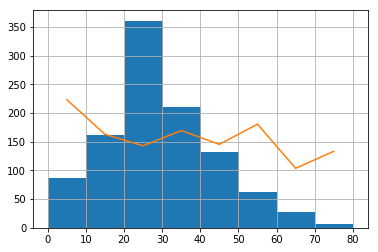

In [11]:
sheet.Age.hist(bins=8)
plt.plot(np.linspace(10, 80, 8)-5, np.array(_survived_rate)*400)
plt.show()